## MULTIPLE LINEAR REGRESSION

In [95]:
import pandas as pd

In [3]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/50_Startups (1).csv")

In [4]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [7]:
import seaborn as sb

In [8]:
import matplotlib.pyplot as plt

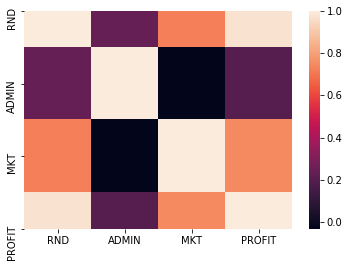

In [9]:
sb.heatmap(A.corr())

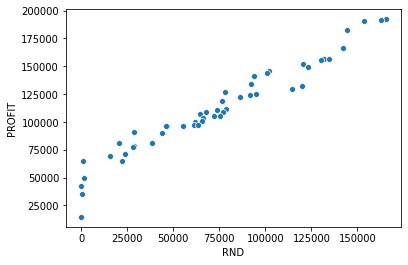

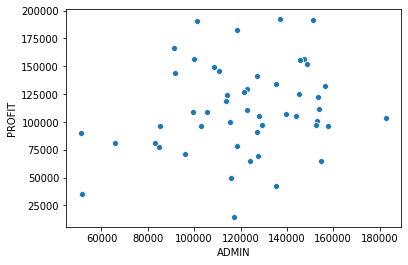

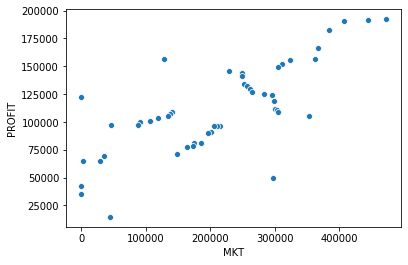

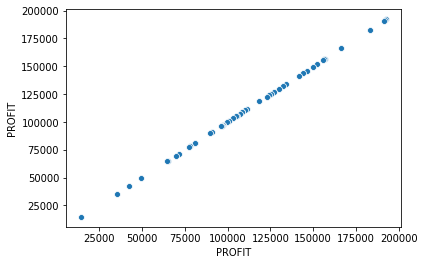

In [11]:
CON=[]
CAT=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        CAT.append(i)
    else:
        CON.append(i)
        sb.scatterplot(A[i],A["PROFIT"])
        plt.show()

In [81]:
X=A[["RND","MKT"]]
Y=A[["PROFIT"]]

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm=LinearRegression()

In [86]:
model=lm.fit(xtrain,ytrain)

In [87]:
pred=model.predict(xtest)

In [88]:
pred

array([[102284.64605183],
       [133873.92383812],
       [134182.1495165 ],
       [ 73701.1069363 ],
       [180642.25299736],
       [114717.24903894],
       [ 68335.07575312],
       [ 97433.45922275],
       [114580.92136452],
       [170343.31979498]])

In [89]:
ytest

,PROFIT
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [91]:
MAE=mean_absolute_error(ytest,pred)

In [92]:
#MSE=mean_squared_error(ytest,pred)

In [93]:
#MSE

67220275.37568125

In [94]:
print(MAE)

6886.594588246515


In [29]:
b1=model.coef_
print(b1)

[[0.8450264]]


In [30]:
b0=model.intercept_

In [31]:
b0

array([50487.24731122])

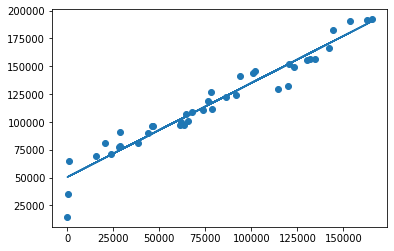

In [32]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,b1*xtrain+b0)

## OLS TECHNIQUE

In [99]:
import statsmodels.api as sm

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [102]:
XCONST=sm.add_constant(xtrain)
OLSmodel=sm.OLS(ytrain,XCONST)
est2=OLSmodel.fit()
est2.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           1.56e-25
Time:                        21:41:26   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e+04   2842.717     17.032      0.000    4.27e+04    5.42e+04
RND            0.8516      0.033     25.542      0.000       0.784       0.919
==============================================================================
Omnibus:                       13.132   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.254
Skew:                          -0.991   Prob(JB):                     0.000295
Kurtosis:                       5.413   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MLR---
PROFIT~(RND,ADMIN)

In [104]:
X=A[["RND","ADMIN"]]
Y=A[["PROFIT"]]

In [105]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lm=LinearRegression()

In [108]:
model=lm.fit(xtrain,ytrain)

In [109]:
pred=model.predict(xtest)

In [112]:
import sklearn.metrics as m

In [113]:
MAEMLR1=m.mean_absolute_error(ytest,pred)

In [114]:
MAEMLR1

6738.115908022104

## REMOVE ADMIN COZ IT DOES NOT REDUCES ERROR
## PROFIT ~ RND,MKT

In [115]:
X=A[["RND","MKT"]]
Y=A[["PROFIT"]]

In [116]:
lm=LinearRegression()

In [117]:
model=lm.fit(xtrain,ytrain)

In [118]:
pred=model.predict(xtest)

In [119]:
MAEMLR2=m.mean_absolute_error(ytest,pred)

In [121]:
print(MAEMLR2)

6738.115908022104


# ols technique

In [122]:
X=A[["RND","MKT"]]
Y=A[["PROFIT"]]

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [125]:
XCONST=sm.add_constant(xtrain)

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [127]:
OLSmodel=sm.OLS(ytrain,XCONST)
est2=OLSmodel.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     377.5
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.43e-25
Time:                        21:54:04   Log-Likelihood:                -421.27
No. Observations:                  40   AIC:                             848.5
Df Residuals:                      37   BIC:                             853.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         4.4e+04   3316.646     13.266      0.000    3.73e+04    5.07e+04
RND            0.7952      0.045     17.756      0.000       0.704       0.886
MKT            0.0423      0.018      2.311      0.027       0.005       0.079
==============================================================================
Omnibus:                       11.295   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.812
Skew:                          -0.965   Prob(JB):                      0.00272
Kurtosis:                       4.834   Cond. No.                     5.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
X=A[["RND","MKT"]]
Y=A[["PROFIT"]]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
XCONST=sm.add_constant(xtrain)
OLSmodel=sm.OLS(ytrain,XCONST)
est2=OLSmodel.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     305.5
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           9.92e-24
Time:                        21:55:11   Log-Likelihood:                -423.66
No. Observations:                  40   AIC:                             853.3
Df Residuals:                      37   BIC:                             858.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.687e+04   3176.782     14.753      0.000    4.04e+04    5.33e+04
RND            0.7821      0.056     14.025      0.000       0.669       0.895
MKT            0.0372      0.021      1.807      0.079      -0.005       0.079
==============================================================================
Omnibus:                       12.280   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.798
Skew:                          -0.993   Prob(JB):                      0.00101
Kurtosis:                       5.081   Cond. No.                     5.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""